In [ ]:
%load_ext autoreload

In [ ]:
from dotenv import load_dotenv
from anthropic import Anthropic
from anthropic import AsyncAnthropic
import json
import time
import base64
import asyncio
import nest_asyncio

# Apply nest_asyncio to allow running asyncio in Jupyter
nest_asyncio.apply()
# load environment variable
load_dotenv()

# au
# tomatically looks for an "ANTHROPIC_API_KEY" environment variable
client = Anthropic()
async_client = AsyncAnthropic()

In [35]:
def get_response(messages):
    response = client.messages.create(
        model="claude-sonnet-4-20250514",
        max_tokens=1000,
        temperature=0.7,
        messages=messages,
        stream=False,
    )
    return response.content[0].text


async def get_async_response(messages):
    async with async_client.messages.stream(
        model="claude-sonnet-4-20250514",
        max_tokens=1000,
        temperature=0.7,
        messages=messages,
    ) as stream:
        async for text in stream.text_stream:
            print(text, end=" ", flush=True)
        response = await stream.get_final_message()
        return response.content[0].text

def cv2base64(image_path):
    with open(image_path, "rb") as ifp:
        b64_image_str = base64.b64encode(ifp.read()).decode("utf-8")
    return b64_image_str

class Messages:
    def __init__(self):
        self.messages = []

    def _build_message(self, role, type, content_str):
        if type == "text":
            self.messages.append(
                {"role": role, "content": [{"type": type, "text": content_str}]}
            )
        elif type == "image" or type == "image+text":
            content=[]
            for part in content_str.split("#"):
                if part.endswith("jpg"):
                    content.append(
                        {
                            "type": "image",
                            "source": {
                                "type": "base64",
                                "media_type": "image/jpeg",
                                "data": cv2base64(part),
                            },
                        }
                    )
                else:
                    content.append({"type": "text", "text": part})
            self.messages.append({"role": role, "content": content})

    def add_user_message(self, type, content):
        self._build_message("user", type, content)

    def add_assistant_message(self, type, content):
        self._build_message("assistant", type, content)

    def get_messages(self):
        return self.messages





# Streaming Interactive Chatbot

In [ ]:
messages=Messages()
while 1:
    user_input = input("User:")
    messages.add_user_message("text", user_input)
    
    # Use asyncio.get_event_loop() instead of asyncio.run()
    loop = asyncio.get_event_loop()
    response = loop.run_until_complete(get_async_response(messages.get_messages()))
    messages.add_assistant_message("text",response)
    

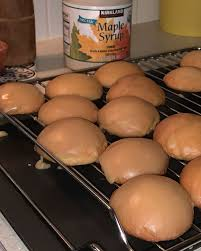

In [36]:
from PIL import Image

image_path = "/Users/mathiasl/sample_images/ego_cook_buns.jpg"
pil_image = Image.open(image_path)
display(pil_image)  # This will display the image in Jupyter notebook


In [38]:
messages = Messages()

messages.add_user_message("image",image_path)

loop = asyncio.get_event_loop()
response = loop.run_until_complete(get_async_response(messages.get_messages()))

messages.add_assistant_message("text",response)
messages.add_user_message("text","how many donuts. Reason using the image within <think> tags and output final answer within <answer> tag")

response = loop.run_until_complete(get_async_response(messages.get_messages()))

I can  see a batch of freshly baked don uts cooling on a wire rack! They  look perfectly golden brown and appear to be glaz ed donuts. There's also what  looks like a can of maple syrup in  the background, which might have been used for glazing or  flavoring. The donuts have that classic roun d shape with holes in the center, and they look  deliciously homemade. Di d you make these yourself? They look like  they turned out great! <think>
I  need to carefully  count the donuts visible  on the cooling  rack. Let me examine  the image systemat ically:

Looking  at the wire  cooling  rack, I can see don uts arranged in what  appears to be roughly  3  rows: 
- Back  row: I  can see  several  donuts 
- Middle row: More  donuts visible 
- Front row: Additional  donuts 

Let  me count more  carefully by  going left  to right, top to bottom: 
Back row: 1 , 2, 3, 4  don uts
Middle row: 1 , 2, 3,  4  donuts  
Front row:  1, 2, 3  donuts ( some  may be partially  visible)

Actually , let  me re co

In [39]:
messages.get_messages()

[{'role': 'user',
  'content': [{'type': 'image',
    'source': {'type': 'base64',
     'media_type': 'image/jpeg',
     'data': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxMSEhUTEhIVFhUVFxUVFRUVFRcXFxUXFRUWFxUXFRUYHSggGBolGxUXITEhJSkrLi4uFx8zODMtNygtLisBCgoKDg0OGhAQGyslHyUtLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tK//AABEIAPsAyQMBIgACEQEDEQH/xAAcAAACAwEBAQEAAAAAAAAAAAAEBQIDBgEHAAj/xABGEAACAQIDBQUFBAcFBwUAAAABAgADEQQhMQUSQVFhBhMicYEyUpGhsULB0fAUFSMzYoLhB1Nyk9IWQ2OSorLxJJTC0+P/xAAaAQACAwEBAAAAAAAAAAAAAAACAwABBAUG/8QAJREAAgICAgMBAAIDAQAAAAAAAAECEQMhEjEEQVETFCIyodGx/9oADAMBAAIRAxEAPwDBo060rRrWkjnMiNzBXyModcoVWXjKKq5Syj0vs7U38NSP8Nvhl90PcaeYijscD+ioDqCw8vESPkRHNQZeojV0K9n1QZwPaAO4ba3GouPaGojCoMzANqMVpMwFyLG3OxEjK9ncPUQfvUamfeAL0z13lGQ87RnhqKuL06qOP4WB+l4NsbHrUyFww1HEHkeWkZ18HRcb1WnTNsyzKuVuO8dICimMba6ZA4Cpy+Y++STZ1Y6UyfK34wpNjUvs94v+GtVUfANaNMNs+wyq1h/Pf5sDC4IHnL4Zqrg6v923wgr4Kp7hl/azH/o+Jp0jjalJHo1HYnu2O+KlNaYzpmwIL38r8Jmqu3qe6u9tGrvGxbdC8VN/Zp+8OHAy+KKbfwaVsBV923mR+MWY7D